## Riksarkivet SBL  - Wikidata ett försök att synka och dansa med dom
version 0.46 this [notebook](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb)

WD egenskap [Property:P3217](https://www.wikidata.org/wiki/Property:P3217) 
* SBL personartiklar som saknar [sv:Wikipedia artikel](https://w.wiki/c5f) < 150
* [SBL vs SKBL female articles](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)  

#### Andra källor vi synkar
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 

### SBL
SBL har idag
* personartiklar
* släktartiklar
  * en person i en släktartikel kan ha en sida som bara pekar till släktartikeln (med text ej alltid länk)

Det saknas idag från Riksarkivet ett API så nedanstående är ett försök att webscrapa deras data och sedan försöka hitta en struktur. 

Målsättningen är att ha personerna som har en SBL personartikel representerade i Wikidata. Kul vore att även ha släktartiklarna kopplade till Wikidata... är inte säkert hur bra strukturen är för släkter/ätter/familjer i WD och sedan behövs det matchas en hel del. En person kan även omnämnas i en släktartikel och bör då i Wikidata ha "beskriven av källa" kopplad till dessa artiklar (exempel Gunnar Morssing [Q5994570#P1343](https://www.wikidata.org/wiki/Q5994570#P1343) som finns i artikel SBL ["Morssing, släkt"](https://sok.riksarkivet.se/sbl/Presentation.aspx?id=9512)) vilket är ett mycket stort jobb om Riksarkivet inte går över till att leverera [länkade data](https://sv.wikipedia.org/wiki/L%C3%A4nkade_data)... se förfrågan om bättre metadata 2019 okt 30 [T236883](https://phabricator.wikimedia.org/T236883)    

**Mina gissningar** 
1. sida med född/död är en person
2. sida med titel släkt är en släktartikel
3. sida med född/död men för kort kan vara en referens till en släktartikel
4. släkt artikel kan ha "[ätt](https://sok.riksarkivet.se/sbl/Search.aspx?t=0)" i titeln men det kan visst även person artiklar ha
5. ....

### jmf SKBL med SBL 
med ett mera komplett Wikidata kan vi nu jämföra [Svenskt Kvinnobiografiskt lexikon - SKBL](https://www.skbl.se/sv/om-skbl) med [Riksarkivet](https://sok.riksarkivet.se/sbl/OmSBL.aspx) då det gäller urval av kvinnor, antal kvinnor, hur dom levererar, API vs. inte API, skillnaden att ha enbart svenska artiklar som SBL med att även ha [engelska artiklar som SKBL](https://www.skbl.se/en/about-skbl) 

* [Notebook](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)

# Webscrape 
1. vi gissar id min 4000 och max 40000


In [1]:
from datetime import datetime
startdate = datetime.now()
print("Last run: ", startdate)

Last run:  2021-10-25 22:30:34.316752


In [2]:
import urllib3, json
import pandas as pd   
from bs4 import BeautifulSoup
import sys
import pprint
http = urllib3.PoolManager()

from tqdm.notebook import trange  
listNewItems =[]

for SBLnr in trange(4000,40000): #gissar min 4000 max 40000
    url = "https://sok.riksarkivet.se/sbl/Presentation.aspx?id=" + str(SBLnr)
    r = http.request('GET', url) 
    if len(r.data) > 11020:
        new_item = dict()
        #print(SBLnr)
        new_item['SBLnr'] = SBLnr
        new_item['SBLlength'] = len(r.data)
        soup = BeautifulSoup(r.data, "html.parser")  
        
        try:
            titel = soup.findAll("span", {"id": "ctl00_MainContent_lblTitle"})[0].get_text()
            new_item['titel'] = titel
            #print ("\t",titel)
        except:
            pass
        try:
            Fodd = soup.findAll("span", {"id": "ctl00_MainContent_lblFodelse"})[0].get_text()
            #print ("\t",Fodd)
            new_item['Fodd'] = Fodd
        except:
            pass
        try:
            Dod = soup.findAll("span", {"id": "ctl00_MainContent_lblDod"})[0].get_text()
            #print ("\t",Dod)
            new_item['Dod'] = Dod
        except:
            pass
        try:
            band = soup.findAll("span", {"id": "ctl00_MainContent_lblBandSida"})[0].get_text()
            #print ("\t",band)
            new_item['Band'] = band
            try:
#                year = band.get_text().split("(")[1].split(")")
                year = band.split("(")[1].split(")")[0]
                #print ("\t\tYear",year)
                new_item['Year'] = year
            except:
                pass
        except:
            pass
            
        listNewItems.append(new_item)
print (len(listNewItems) ," antal poster")
        


  0%|          | 0/36000 [00:00<?, ?it/s]

10197  antal poster


In [3]:
import csv
if len(listNewItems) > 0:
    keys = listNewItems[0].keys()
    with open("SBL_newfile.csv", "w", newline='') as SBLfile:
        dict_writer = csv.DictWriter(SBLfile, keys)
        dict_writer.writeheader()
        dict_writer.writerows(listNewItems)

    dfSBLcsv = pd.read_csv("SBL_newfile.csv", sep=",")   
    
else:
    print ("Ingen fil skapas inga nya poster") 

In [4]:
pd.set_option("display.max.rows", None) 

In [5]:
dfSBLcsv.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10197 non-null  int64 
 1   SBLlength  10197 non-null  int64 
 2   titel      10197 non-null  object
 3   Fodd       7117 non-null   object
 4   Dod        7603 non-null   object
 5   Band       10197 non-null  object
 6   Year       10176 non-null  object
dtypes: int64(2), object(5)
memory usage: 557.8+ KB


## Wikidata hämtar alla med P3217 satt 
dvs. även släkt kopplingar

In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

#https://w.wiki/cvY
querySBL = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?wid)  ?sblid ?gender ?genderLabel WHERE {
?item wdt:P3217 ?sblid.
?item wdt:P31 wd:Q5.
optional {?item wdt:P21 ?gender}
SERVICE wikibase:label { bd:serviceParam wikibase:language "sv,en". }  
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDSBLtot = get_sparql_dataframe(endpoint_url, querySBL)


In [7]:
WDSBLtot.sort_index(inplace=True)  

In [8]:
WDSBLtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7623 entries, 0 to 7622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wid          7623 non-null   object
 1   sblid        7623 non-null   object
 2   gender       7623 non-null   object
 3   genderLabel  7623 non-null   object
dtypes: object(4)
memory usage: 238.3+ KB


In [9]:
%matplotlib inline    
import matplotlib.pyplot as plt   
plotSBLYearBand = dfSBLcsv["Year"].value_counts()


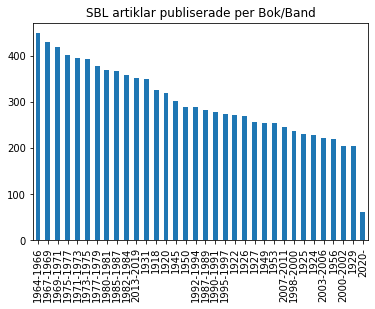

In [10]:
plotSBLYearBand.plot( kind = 'bar') 
plt.title("SBL artiklar publiserade per Bok/Band")
plt.show()

In [11]:
dfSBLcsv

SBLnr  SBLlength                                              titel  \
0       5490      12055                                      Abelin, släkt   
1       5491      33234                                    Gustaf R Abelin   
2       5492      41671                                   Hjalmar A Abelin   
3       5493      21745                                  C Rudolf Z Abelin   
4       5494      27035                                  P Wilhelm Abenius   
5       5495      17971                                 Abraham Brodersson   
6       5496      13025                                  Abrahamson, släkt   
7       5497      21773                                  August Abrahamson   
8       5498      22324                   Euphrosyne Abrahamson (f. Leman)   
9       5499      21623                       Laurentius Gustaf Abrahamson   
10      5500      47174                                 Petter Abrahamsson   
11      5501     102071                       Abrahamus Andreæ Angermannus   
12      5502      11049                             Abramson, Erik Leonard   
13      5503      32893                                      Erik Acharius   
14      5504      12387                                   Achrelius, släkt   
15      5505      30470                                   Daniel Achrelius   
16      5506      11069                         Achrelius, Ericus Danielis   
17      5507      35696                                  Abraham Achrenius   
18      5508      22727                                      J Axel G Acke   
19      5509      29700                             Johan Gustaf Acrel, af   
20      5510      50150                                         Olof Acrel   
21      5511      14221                                    Acrelius, släkt   
22      5512      41032                                    Israel Acrelius   
23      5513      17111                                      Adalvard d.y.   
24      5514      18076                                      Adalvard d.ä.   
25      5516      12351                                    Adelborg, släkt   
26      5517      20098                                 Gertrud V Adelborg   
27      5518      15122                                 E A Maria Adelborg   
28      5519      19949                                 E Ottilia Adelborg   
29      5520      18193                                  Per Otto Adelborg   
30      5521      12680                                  Adelcrantz, släkt   
31      5522      42478                            Carl Fredric Adelcrantz   
32      5523      29717                        Giöran (Georg) J Adelcrantz   
33      5524      13015                                    Adelheim, släkt   
34      5526      17094                             Johan Fredric Adelheim   
35      5527      11541                                   Adelsköld, släkt   
36      5528      49294                                  Claes A Adelsköld   
37      5529      19729                          Johan Christian Adelsköld   
38      5530      16271                                   Adelswärd, släkt   
39      5531      21225                               Eric Göran Adelswärd   
40      5532      37200                            Eric Reinhold Adelswärd   
41      5533      22063                        Georg (Georges) N Adelswärd   
42      5534      20205                                    Johan Adelswärd   
43      5536      20175                Renauld Casimir Oscar Adelswärd, d'   
44      5537      45232                                A Theodor Adelswärd   
45      5538      15331                                              Adils   
46      5539      25286                                  Bror Victor Adler   
47      5540      92075                                Johan Adler Salvius   
48      5541      12718                                   Adlerberg, släkt   
49      5542      28510                              Carl Gustaf Adlerberg   
50      5543      11793      

In [12]:
dfSBLcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10197 non-null  int64 
 1   SBLlength  10197 non-null  int64 
 2   titel      10197 non-null  object
 3   Fodd       7117 non-null   object
 4   Dod        7603 non-null   object
 5   Band       10197 non-null  object
 6   Year       10176 non-null  object
dtypes: int64(2), object(5)
memory usage: 557.8+ KB


In [13]:
plotSBL = dfSBLcsv.copy()
# check year eg. empty year in https://sok.riksarkivet.se/sbl/Presentation.aspx?id=34648 --> set 2021
#dfSBLcsv["Year"]
plotSBL[plotSBL["Year"].isnull()]

SBLnr  SBLlength                               titel  \
9799   34619      11120                 Stuart, Hans (John)   
9828   34648      47394             Carl Olof (Olle) Sturén   
9841   34661      11160             Nathorst, Johan Theofil   
9842   34662      11214       Nathorst, Carl-Bertel Richard   
9916   34736      11231  Suremain, Charles Jean Baptiste de   
9917   34737      11074                      Talis Qualis,    
9918   34738      11025                           Vitalis,    
9919   34739      11059                         Orvar Odd,    
9920   34740      11030                          Arreskow,    
10068  34894      11065                        Vasa, Gustav   
10069  34895      11105                    Heliga, Birgitta   
10070  34896      11109                     Ladulås, Magnus   
10071  34897      11065                        jarl, Birger   
10072  34898      11110                   Jedvardsson, Erik   
10073  34899      11070                       Vasa, Cecilia   
10074  34900      11119                  Agricola, Kristian   
10132  34968      11114                  Sverker Karlsson,    
10133  34969      11064                        Sverker II,    
10134  34970      11080                     Svensson, Herta   
10154  34995      11114                    Svinhufvud, Jöns   
10196  35047      11170           Gyllenhielm, Carl Carlson   

                                                    Fodd  \
9799                                                 NaN   
9828   Född:1919-02-20 – Katarina församling, Stockho...   
9841                                                 NaN   
9842                                                 NaN   
9916                                                 NaN   
9917                                                 NaN   
9918                                                 NaN   
9919                                                 NaN   
9920                                                 NaN   
10068                                                NaN   
10069                                                NaN   
10070                                                NaN   
10071                                                NaN   
10072                                                NaN   
10073                                                NaN   
10074                                                NaN   
10132                                                NaN   
10133                                                NaN   
10134                                                NaN   
10154                                                NaN   
10196                                                NaN   

                             Dod               Band Year  
9799                         NaN      Band , sida .  NaN  
9828   Död:2003-05-16 – Spanien       Band , sida .  NaN  
9841                         NaN      Band , sida .  NaN  
9842                         NaN      Band , sida .  NaN  
9916                         NaN      Band , sida .  NaN  
9917                         NaN      Band , sida .  NaN  
9918                         NaN      Band , sida .  NaN  
9919                         NaN      Band , sida .  NaN  
9920                         NaN      Band , sida .  NaN  
10068                        NaN      Band , sida .  NaN  
10069                        NaN      Band , sida .  NaN  
10070                        NaN      Band , sida .  NaN  
10071                        NaN      Band , sida .  NaN  
10072                        NaN      Band , sida .  NaN  
10073                        NaN      Band , sida .  NaN  
10074                        NaN  Band 1, sida 294.  NaN  
10132                        NaN      Band , sida .  NaN  
10133                        NaN      Band , sida .  NaN  
10134                        NaN      Band , sida .  NaN  
10154                        NaN      Band , sida .  NaN  
10196                        NaN      Band , sida .  NaN

In [14]:

plotSBL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10197 non-null  int64 
 1   SBLlength  10197 non-null  int64 
 2   titel      10197 non-null  object
 3   Fodd       7117 non-null   object
 4   Dod        7603 non-null   object
 5   Band       10197 non-null  object
 6   Year       10176 non-null  object
dtypes: int64(2), object(5)
memory usage: 557.8+ KB


In [15]:

#plotSBL.[plotSBL["Year"].isnull()] 
#df.replace('N/A',np.NaN)
#plotSBL['Year'] = plotSBL['Year'].replace({'np.nan': "2021"})   

plotSBL["Year"].fillna("2021", inplace = True)

In [16]:
plotSBL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10197 non-null  int64 
 1   SBLlength  10197 non-null  int64 
 2   titel      10197 non-null  object
 3   Fodd       7117 non-null   object
 4   Dod        7603 non-null   object
 5   Band       10197 non-null  object
 6   Year       10197 non-null  object
dtypes: int64(2), object(5)
memory usage: 557.8+ KB


In [17]:
import matplotlib.dates as mdates  
plotSBL["YearPublished"] = plotSBL["Year"].str[-4:] 
plotSBL.set_index('Year',inplace=True)  

In [18]:
#plotSBL["YearPublished"] = plotSBL["YearPublished"].astype("datetime64")
plotSBL["YearPublished"] = pd.to_datetime(plotSBL["YearPublished"], errors = 'coerce')

In [19]:
plotSBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10197 entries, 1918 to 2021
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SBLnr          10197 non-null  int64         
 1   SBLlength      10197 non-null  int64         
 2   titel          10197 non-null  object        
 3   Fodd           7117 non-null   object        
 4   Dod            7603 non-null   object        
 5   Band           10197 non-null  object        
 6   YearPublished  10135 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 637.3+ KB


In [20]:
plotSBL.head()

SBLnr  SBLlength              titel  \
Year                                        
1918   5490      12055      Abelin, släkt   
1918   5491      33234    Gustaf R Abelin   
1918   5492      41671   Hjalmar A Abelin   
1918   5493      21745  C Rudolf Z Abelin   
1918   5494      27035  P Wilhelm Abenius   

                                                   Fodd  \
Year                                                      
1918                                                NaN   
1918  Född:1819-05-17 – Linköpings Domkyrkoförsamlin...   
1918  Född:1817-05-22 – Linköpings Domkyrkoförsamlin...   
1918            Född:1864-05-30 – Malmö stad, Skåne län   
1918    Född:1864-05-21 – Orsa församling, Dalarnas län   

                                                    Dod  \
Year                                                      
1918                                                NaN   
1918  Död:1903-09-19 – Kvillinge församling, Östergö...   
1918   Död:1893-09-13 – Stockholms stad, Stockholms län   
1918  Död:1961 – Västra Karups församling, Kristians...   
1918        Död:1956 – Ramsbergs församling, Örebro län   

                          Band YearPublished  
Year                                          
1918   Band 01 (1918), sida 1.    1918-01-01  
1918   Band 01 (1918), sida 5.    1918-01-01  
1918   Band 01 (1918), sida 1.    1918-01-01  
1918   Band 01 (1918), sida 9.    1918-01-01  
1918  Band 01 (1918), sida 11.    1918-01-01

In [21]:
plotSBL["url"] = "https://sok.riksarkivet.se/sbl/Presentation.aspx?id=" + str(dfSBLcsv["SBLnr"])

In [22]:
#dfFamily = dfSBLAuthorcsv.dropna()  
dfPerson = plotSBL.dropna(subset = ['Fodd', 'Dod'])

In [23]:
dfPerson.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7110 entries, 1918 to 2020-
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SBLnr          7110 non-null   int64         
 1   SBLlength      7110 non-null   int64         
 2   titel          7110 non-null   object        
 3   Fodd           7110 non-null   object        
 4   Dod            7110 non-null   object        
 5   Band           7110 non-null   object        
 6   YearPublished  7075 non-null   datetime64[ns]
 7   url            7110 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 499.9+ KB


### Join Wikidata
as Wikidata we guess knows what articles are about a man and a women we can try merge 

In [24]:
plotSBL['SBLnr']= plotSBL['SBLnr'].astype(str).astype(int)
plotSBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10197 entries, 1918 to 2021
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SBLnr          10197 non-null  int64         
 1   SBLlength      10197 non-null  int64         
 2   titel          10197 non-null  object        
 3   Fodd           7117 non-null   object        
 4   Dod            7603 non-null   object        
 5   Band           10197 non-null  object        
 6   YearPublished  10135 non-null  datetime64[ns]
 7   url            10197 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 717.0+ KB


In [25]:
plotSBL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10197 entries, 1918 to 2021
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SBLnr          10197 non-null  int64         
 1   SBLlength      10197 non-null  int64         
 2   titel          10197 non-null  object        
 3   Fodd           7117 non-null   object        
 4   Dod            7603 non-null   object        
 5   Band           10197 non-null  object        
 6   YearPublished  10135 non-null  datetime64[ns]
 7   url            10197 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 717.0+ KB


In [26]:
WDSBLtot['sblid']= WDSBLtot['sblid'].astype(str).astype(int)
WDSBLtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7623 entries, 0 to 7622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wid          7623 non-null   object
 1   sblid        7623 non-null   int64 
 2   gender       7623 non-null   object
 3   genderLabel  7623 non-null   object
dtypes: int64(1), object(3)
memory usage: 238.3+ KB


In [27]:
WDSBLtot.head()

wid  sblid                                   gender genderLabel
0   Q45099   6751  http://www.wikidata.org/entity/Q6581097         man
1   Q67194   5575  http://www.wikidata.org/entity/Q6581097         man
2  Q242598  18364  http://www.wikidata.org/entity/Q6581072      kvinna
3  Q287563   6755  http://www.wikidata.org/entity/Q6581072      kvinna
4  Q343674   7317  http://www.wikidata.org/entity/Q6581097         man

In [28]:
WDSBLtot["genderLabel"].value_counts()  

man         7089
kvinna       533
transman       1
Name: genderLabel, dtype: int64

In [29]:
#WDSBLtot plotSBLYearPublished  
mergeWDSBLwebscrape = pd.merge(WDSBLtot, plotSBL,how='outer',left_on='sblid', right_on='SBLnr',indicator=True)   
mergeWDSBLwebscrape.rename(columns={"_merge": "WD_Webscrape"},inplace = True)
mergeWDSBLwebscrape['WD_Webscrape'] = mergeWDSBLwebscrape['WD_Webscrape'].str.replace('left_only','WD_only').str.replace('right_only','scrape_only')
mergeWDSBLwebscrape["WD_Webscrape"].value_counts()  


both           7623
scrape_only    2576
Name: WD_Webscrape, dtype: int64

In [30]:
dfWD_SBL_article = mergeWDSBLwebscrape[mergeWDSBLwebscrape.WD_Webscrape.str.contains("both")]
#dfWDSKBLarticle.YearPublished.dt.strftime("%Y") 
#dfWDSKBLarticle.info()  
dfWD_SBL_female_article = dfWD_SBL_article[dfWD_SBL_article.genderLabel.str.contains("kvinna")]
dfWD_SBL_female_article.head()  
# Year genderLabel count

wid    sblid                                   gender genderLabel  \
2    Q242598  18364.0  http://www.wikidata.org/entity/Q6581072      kvinna   
3    Q287563   6755.0  http://www.wikidata.org/entity/Q6581072      kvinna   
5    Q526915  15535.0  http://www.wikidata.org/entity/Q6581072      kvinna   
13  Q2303658   7498.0  http://www.wikidata.org/entity/Q6581072      kvinna   
15  Q2925391  16949.0  http://www.wikidata.org/entity/Q6581072      kvinna   

    SBLnr  SBLlength                           titel  \
2   18364      15452                          Blanka   
3    6755      18952                         Rikissa   
5   15535      55987   Eugénie (C. Eugénie A. A. A.)   
13   7498      25115                        Ragnhild   
15  16949      12769                         Brigida   

                                                 Fodd  \
2                                                 NaN   
3                                                 NaN   
5   Född:1830-04-24 – Stockholms stad, Stockholms ...   
13                           Född:troligen 1000-talet   
15                                                NaN   

                                                  Dod  \
2                                            Död:1363   
3                                      Död:1220-05-08   
5   Död:1889-04-23 – Stockholms stad, Stockholms l...   
13                                  Död:troligen 1100   
15                                  Död:levde på 1100   

                              Band YearPublished  \
2        Band 04 (1924), sida 768.    1924-01-01   
3   Band 30 (1998-2000), sida 198.    2000-01-01   
5        Band 14 (1953), sida 662.    1953-01-01   
13  Band 29 (1995-1997), sida 613.    1997-01-01   
15       Band 06 (1926), sida 231.    1926-01-01   

                                                  url WD_Webscrape  
2   https://sok.riksarkivet.se/sbl/Presentation.as...         both  
3   https://sok.riksarkivet.se/sbl/Presentation.as...         both  
5   https://sok.riksarkivet.se/sbl/Presentation.as...         both  
13  https://sok.riksarkivet.se/sbl/Presentation.as...         both  
15  https://sok.riksarkivet.se/sbl/Presentation.as...         both

In [31]:
# set date as index
#fig = plt.subplots(figsize=(15,7))

#plotSBLYearFemailPublished = dfWD_SBL_female_article["YearPublished"].dt.strftime("%Y").value_counts().sort_index().plot(kind='bar', color=['red'])

#plt.title("SBL articles published per Year about women 1918-2019")
#plt.savefig('SBL_published_articles_women_1918-2018.png')  
#plt.show()  
#plotSBLYearPublished.info 


In [32]:
#dfWD_SBL_female_article["YearPublished"].dt.strftime("%Y").value_counts().sort_index(ascending=False)

In [33]:
dfWD_SBL_female_article.head()

wid    sblid                                   gender genderLabel  \
2    Q242598  18364.0  http://www.wikidata.org/entity/Q6581072      kvinna   
3    Q287563   6755.0  http://www.wikidata.org/entity/Q6581072      kvinna   
5    Q526915  15535.0  http://www.wikidata.org/entity/Q6581072      kvinna   
13  Q2303658   7498.0  http://www.wikidata.org/entity/Q6581072      kvinna   
15  Q2925391  16949.0  http://www.wikidata.org/entity/Q6581072      kvinna   

    SBLnr  SBLlength                           titel  \
2   18364      15452                          Blanka   
3    6755      18952                         Rikissa   
5   15535      55987   Eugénie (C. Eugénie A. A. A.)   
13   7498      25115                        Ragnhild   
15  16949      12769                         Brigida   

                                                 Fodd  \
2                                                 NaN   
3                                                 NaN   
5   Född:1830-04-24 – Stockholms stad, Stockholms ...   
13                           Född:troligen 1000-talet   
15                                                NaN   

                                                  Dod  \
2                                            Död:1363   
3                                      Död:1220-05-08   
5   Död:1889-04-23 – Stockholms stad, Stockholms l...   
13                                  Död:troligen 1100   
15                                  Död:levde på 1100   

                              Band YearPublished  \
2        Band 04 (1924), sida 768.    1924-01-01   
3   Band 30 (1998-2000), sida 198.    2000-01-01   
5        Band 14 (1953), sida 662.    1953-01-01   
13  Band 29 (1995-1997), sida 613.    1997-01-01   
15       Band 06 (1926), sida 231.    1926-01-01   

                                                  url WD_Webscrape  
2   https://sok.riksarkivet.se/sbl/Presentation.as...         both  
3   https://sok.riksarkivet.se/sbl/Presentation.as...         both  
5   https://sok.riksarkivet.se/sbl/Presentation.as...         both  
13  https://sok.riksarkivet.se/sbl/Presentation.as...         both  
15  https://sok.riksarkivet.se/sbl/Presentation.as...         both

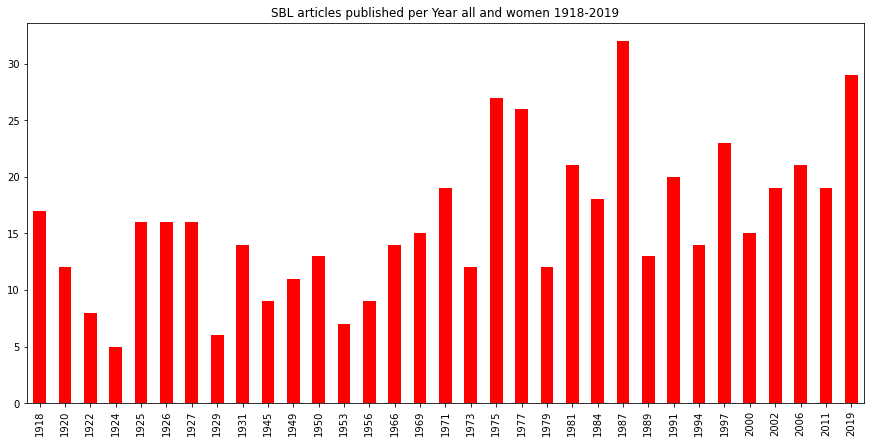

In [34]:
fig = plt.subplots(figsize=(15,7))

plotSBLYearFemailPublished = dfWD_SBL_female_article["YearPublished"].dt.strftime("%Y").value_counts().sort_index().plot(kind='bar', color=['red'])
#plotSBLYearPublished = plotSBL["YearPublished"].dt.strftime("%Y").value_counts().sort_index()
#plotSBLYearPublished.plot( kind = 'bar', color=['g']) 
plt.title("SBL articles published per Year all and women 1918-2019")
plt.savefig('SBL_published_articles_all_women_1918-2018.png')  
plt.show()  

In [35]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
          'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                    'lifespan': lifespan}, index=index)
#ax = df.plot.bar(rot=0)


#plotSBLYearPublished_FM = dfWD_SBL_article.groupby(["YearPublished"])
#plotSBLYearPublished_FM = dfWD_SBL_article.groupby(["YearPublished"])["genderLabel"].transform("count")
#df['Counts'] = df.groupby(['Color'])['Value'].transform('count')
#plotSBLYearPublished_FM.head()  
dfWD_SBL_article.info()
dfWD_SBL_article.head()

# Group by YearPublished genderLabel

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7623 entries, 0 to 7622
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            7623 non-null   object        
 1   sblid          7623 non-null   float64       
 2   gender         7623 non-null   object        
 3   genderLabel    7623 non-null   object        
 4   SBLnr          7623 non-null   int64         
 5   SBLlength      7623 non-null   int64         
 6   titel          7623 non-null   object        
 7   Fodd           7104 non-null   object        
 8   Dod            7583 non-null   object        
 9   Band           7623 non-null   object        
 10  YearPublished  7597 non-null   datetime64[ns]
 11  url            7623 non-null   object        
 12  WD_Webscrape   7623 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 833.8+ KB


wid    sblid                                   gender genderLabel  \
0   Q45099   6751.0  http://www.wikidata.org/entity/Q6581097         man   
1   Q67194   5575.0  http://www.wikidata.org/entity/Q6581097         man   
2  Q242598  18364.0  http://www.wikidata.org/entity/Q6581072      kvinna   
3  Q287563   6755.0  http://www.wikidata.org/entity/Q6581072      kvinna   
4  Q343674   7317.0  http://www.wikidata.org/entity/Q6581097         man   

   SBLnr  SBLlength                    titel  \
0   6751      48047             Marcel Riesz   
1   5575      56308              Adolf Johan   
2  18364      15452                   Blanka   
3   6755      18952                  Rikissa   
4   7317      45036  Baltzar J E Platen, von   

                                                Fodd  \
0                  Född:1886-11-16 – Ungern (I Györ)   
1  Född:1629-10-11 – Gryts församling (E-län), Ös...   
2                                                NaN   
3                                                NaN   
4  Född:1804-04-16 – Näs församling (R-län), Skar...   

                                                 Dod  \
0  Död:1969-09-04 – Lunds allhelgonaförsamling, S...   
1  Död:1689-10-14 – Gryts församling (E-län), Öst...   
2                                           Död:1363   
3                                     Död:1220-05-08   
4  Död:1875-03-20 – Jakobs församling, Stockholms...   

                             Band YearPublished  \
0  Band 30 (1998-2000), sida 189.    2000-01-01   
1       Band 01 (1918), sida 209.    1918-01-01   
2       Band 04 (1924), sida 768.    1924-01-01   
3  Band 30 (1998-2000), sida 198.    2000-01-01   
4  Band 29 (1995-1997), sida 359.    1997-01-01   

                                                 url WD_Webscrape  
0  https://sok.riksarkivet.se/sbl/Presentation.as...         both  
1  https://sok.riksarkivet.se/sbl/Presentation.as...         both  
2  https://sok.riksarkivet.se/sbl/Presentation.as...         both  
3  https://sok.riksarkivet.se/sbl/Presentation.as...         both  
4  https://sok.riksarkivet.se/sbl/Presentation.as...         both

### Släktartiklar  
Nedan lite gissning att en släktartikel har ordet släkt i titeln. 

* se också [webscarping Adelsvapen](https://gist.github.com/salgo60/31e0c4bf6f075c373fb5bbfb6cc807c6)
* csv lista skapad nedan på [GIST](https://gist.github.com/salgo60/31e0c4bf6f075c373fb5bbfb6cc807c6#gistcomment-3457126) 

In [36]:
dfFamily = plotSBL[plotSBL.isnull().any(1)]

In [37]:
dfFamily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3122 entries, 1918 to 2021
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SBLnr          3122 non-null   int64         
 1   SBLlength      3122 non-null   int64         
 2   titel          3122 non-null   object        
 3   Fodd           42 non-null     object        
 4   Dod            528 non-null    object        
 5   Band           3122 non-null   object        
 6   YearPublished  3060 non-null   datetime64[ns]
 7   url            3122 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 219.5+ KB


In [38]:
#dfFamily

In [39]:
dfFamilySlakt = dfFamily[dfFamily.titel.str.contains("släkt")]
#dfFamilySlakt

In [40]:
dictFamily = dfFamilySlakt.to_dict()

In [41]:
dfFamily.titel.str.contains("släkt").sum()

1725

In [42]:
dfFamily.titel.str.contains("ätten").sum()

38

In [43]:
dfFamily.titel.str.contains("Släkt").sum()

1

In [44]:
dfFamily.Dod.str.contains("senas").sum()

23

In [45]:
#dfFamily[dfFamily.Dod.str.contains("senas", na=False)]

In [46]:
dfFamily[dfFamily.Fodd.str.contains("", na=False)].head

<bound method NDFrame.head of            SBLnr  SBLlength                                  titel  \
Year                                                                 
1918        5671      18057              A Adele L Almati-Rundberg   
1918        5735      24660                Johan Mathias Ambrosius   
2003-2006   6061      45323                         Peter A Smalze   
1931       15777      19818                         G. Adrian Dahl   
1931       15784      32677                    Magnus E. Dahlander   
1931       15785      56319                       Robert Dahlander   
1926       16990      28721                       Carl Axel Brolén   
2020-      34967      45921                      Sverker den yngre   
2020-      34971      45482  Gunvor Gerda Maria Svensson-Lundkvist   
2020-      34972      41629          Berta Eleonora Svensson-Piehl   
2020-      34974      34158           Swensson-Tollin Albert Kaleb   
2020-      34975      27498                Birger Thorsten S

In [47]:
#Check diff WDSBLtot and plotSBL 
WDSBLtot.duplicated(subset=['wid']).sum()

1

In [48]:
plotSBL.duplicated(subset=['SBLnr']).sum()

0

In [49]:
WDSBLtot.duplicated(subset=['sblid']).sum()

2

In [50]:
WDSBLtot = WDSBLtot.rename(columns={'sblid':'SBLnr'})
WDSBLtot['SBLnr']= WDSBLtot['SBLnr'].astype(str).astype(int)
WDSBLtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7623 entries, 0 to 7622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wid          7623 non-null   object
 1   SBLnr        7623 non-null   int64 
 2   gender       7623 non-null   object
 3   genderLabel  7623 non-null   object
dtypes: int64(1), object(3)
memory usage: 238.3+ KB


In [51]:
dfmerge = pd.merge(WDSBLtot, plotSBL,how='outer', on='SBLnr',indicator=True)

In [52]:
dfmerge["_merge"].value_counts()

both          7623
right_only    2576
left_only        0
Name: _merge, dtype: int64

In [53]:
#dfmerge

In [54]:
dfmerge['_merge'] = dfmerge['_merge'].str.replace('left_only','WD_only').str.replace('right_only','SBL_only')


In [55]:
WDSBLonly = dfmerge[dfmerge["_merge"] == "SBL_only"].copy()   
dfmerge["_merge"].value_counts()

both        7623
SBL_only    2576
Name: _merge, dtype: int64

In [56]:
WD_only = dfmerge[dfmerge["_merge"] == "WD_only"].copy()   
WD_only

Empty DataFrame
Columns: [wid, SBLnr, gender, genderLabel, SBLlength, titel, Fodd, Dod, Band, YearPublished, url, _merge]
Index: []

In [57]:
WDSBLonly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 7623 to 10198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            0 non-null      object        
 1   SBLnr          2576 non-null   int64         
 2   gender         0 non-null      object        
 3   genderLabel    0 non-null      object        
 4   SBLlength      2576 non-null   int64         
 5   titel          2576 non-null   object        
 6   Fodd           14 non-null     object        
 7   Dod            22 non-null     object        
 8   Band           2576 non-null   object        
 9   YearPublished  2540 non-null   datetime64[ns]
 10  url            2576 non-null   object        
 11  _merge         2576 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 261.6+ KB


In [58]:
WDSBLonly.titel.str.contains("släkt").sum() 


1688

In [59]:
WDSBLonly[WDSBLonly.titel.str.contains("ätt")].head

<bound method NDFrame.head of        wid  SBLnr gender genderLabel  SBLlength  \
7803   NaN   7249    NaN         NaN      23507   
7975   NaN   9007    NaN         NaN      41801   
7976   NaN   9008    NaN         NaN      11045   
7977   NaN   9009    NaN         NaN      11035   
8265   NaN  11237    NaN         NaN      39684   
8266   NaN  11238    NaN         NaN      11039   
8267   NaN  11239    NaN         NaN      11039   
8282   NaN  11376    NaN         NaN      34543   
8283   NaN  11377    NaN         NaN      11143   
8284   NaN  11378    NaN         NaN      11133   
8285   NaN  11379    NaN         NaN      11168   
8286   NaN  11380    NaN         NaN      11138   
8481   NaN  12565    NaN         NaN      21946   
8482   NaN  12566    NaN         NaN      11080   
8483   NaN  12568    NaN         NaN      11119   
8579   NaN  13016    NaN         NaN      22639   
8598   NaN  13096    NaN         NaN      17861   
8620   NaN  13177    NaN         NaN      16469   
8

In [60]:
#Inte släkt 
WDmissingPerson = WDSBLonly[~WDSBLonly.titel.str.contains("släkt")]

In [61]:
WDmissingPerson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 7625 to 10198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            0 non-null      object        
 1   SBLnr          888 non-null    int64         
 2   gender         0 non-null      object        
 3   genderLabel    0 non-null      object        
 4   SBLlength      888 non-null    int64         
 5   titel          888 non-null    object        
 6   Fodd           14 non-null     object        
 7   Dod            22 non-null     object        
 8   Band           888 non-null    object        
 9   YearPublished  854 non-null    datetime64[ns]
 10  url            888 non-null    object        
 11  _merge         888 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 90.2+ KB


In [62]:
#WDmissingPerson["Year"].value_counts()

In [63]:
print("Min, Max SBLlength: ", WDmissingPerson.SBLlength.min(), WDmissingPerson.SBLlength.max())

Min, Max SBLlength:  11021 95461


In [64]:
# sorterar artiklarna efter sidstorlek för att kanske hitta någon vi missat  
# wid är Wikidata objekt , NaN är att det saknas  
# SBLnr är id i SBL
# SBLlength är sidans storlek hos SBL 
# Fodd, Dod... är det jag hittade i WEBsidan, NaN innebär saknas

#WDmissingPerson.sort_values(by='SBLlength', ascending=False, na_position='first')

In [65]:
WDmissingPerson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 7625 to 10198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            0 non-null      object        
 1   SBLnr          888 non-null    int64         
 2   gender         0 non-null      object        
 3   genderLabel    0 non-null      object        
 4   SBLlength      888 non-null    int64         
 5   titel          888 non-null    object        
 6   Fodd           14 non-null     object        
 7   Dod            22 non-null     object        
 8   Band           888 non-null    object        
 9   YearPublished  854 non-null    datetime64[ns]
 10  url            888 non-null    object        
 11  _merge         888 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 90.2+ KB


In [66]:
WDmissingPerson["YearPublished"].value_counts()

2019-01-01    140
2011-01-01     65
1953-01-01     53
1987-01-01     44
2006-01-01     36
1931-01-01     34
1950-01-01     33
1994-01-01     31
1979-01-01     29
2000-01-01     26
1984-01-01     26
1981-01-01     25
1975-01-01     24
1966-01-01     23
2002-01-01     21
1989-01-01     21
1945-01-01     21
1929-01-01     20
1956-01-01     20
2021-01-01     20
1969-01-01     20
1971-01-01     20
1949-01-01     16
1973-01-01     11
1991-01-01     11
1920-01-01     10
1977-01-01     10
1926-01-01      9
1997-01-01      8
1918-01-01      7
1925-01-01      7
1927-01-01      5
1922-01-01      4
1924-01-01      4
Name: YearPublished, dtype: int64

In [67]:
print("End run: ", datetime.now())

End run:  2021-10-25 23:04:56.201174


In [68]:
#Släkt 
#WDSlakt = WDSBLonly[~WDSBLonly.titel.str.contains("släkt")].copy

In [69]:
WDSlakt = WDSBLonly[WDSBLonly.titel.str.contains("släkt")]

In [70]:
WDSlakt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 7623 to 10183
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            0 non-null      object        
 1   SBLnr          1688 non-null   int64         
 2   gender         0 non-null      object        
 3   genderLabel    0 non-null      object        
 4   SBLlength      1688 non-null   int64         
 5   titel          1688 non-null   object        
 6   Fodd           0 non-null      object        
 7   Dod            0 non-null      object        
 8   Band           1688 non-null   object        
 9   YearPublished  1686 non-null   datetime64[ns]
 10  url            1688 non-null   object        
 11  _merge         1688 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 171.4+ KB


In [71]:
#Need a workaround as pandas to_csv dont work ?!?!?
#for  index,row in WDSlakt.iterrows():
#    print(row["SBLnr"],row["titel"],row["Year"],row["url"])    
#    print(row["SBLnr"],"|",row["titel"],"|",row["Year"])  

List produced also on [GIST](https://gist.github.com/salgo60/31e0c4bf6f075c373fb5bbfb6cc807c6#gistcomment-3457126) 

### Estimate published articles male/female /family


In [72]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10199 entries, 0 to 10198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            7623 non-null   object        
 1   SBLnr          10199 non-null  int64         
 2   gender         7623 non-null   object        
 3   genderLabel    7623 non-null   object        
 4   SBLlength      10199 non-null  int64         
 5   titel          10199 non-null  object        
 6   Fodd           7118 non-null   object        
 7   Dod            7605 non-null   object        
 8   Band           10199 non-null  object        
 9   YearPublished  10137 non-null  datetime64[ns]
 10  url            10199 non-null  object        
 11  _merge         10199 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.0+ MB


In [73]:
personSBL = dfmerge[~dfmerge['wid'].isnull()] 

In [74]:
personSBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7623 entries, 0 to 7622
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   wid            7623 non-null   object        
 1   SBLnr          7623 non-null   int64         
 2   gender         7623 non-null   object        
 3   genderLabel    7623 non-null   object        
 4   SBLlength      7623 non-null   int64         
 5   titel          7623 non-null   object        
 6   Fodd           7104 non-null   object        
 7   Dod            7583 non-null   object        
 8   Band           7623 non-null   object        
 9   YearPublished  7597 non-null   datetime64[ns]
 10  url            7623 non-null   object        
 11  _merge         7623 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 774.2+ KB


In [75]:
#plotSBLGender = personSBL.groupby(["genderLabel", "YearPublished"]).size()
#plotSBLGender  

In [76]:
#plotSBLGender.unstack()

In [80]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - startdate))

Ended:  2021-10-25 23:11:50.058413
Time elapsed (hh:mm:ss.ms) 0:41:15.742279
